In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:27<00:00, 43.2MB/s]
100% 1.06G/1.06G [00:27<00:00, 42.1MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [32]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [7]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 64s 90ms/step - loss: 0.5947 - accuracy: 0.6692 - val_loss: 0.5290 - val_accuracy: 0.7234
Epoch 2/10
625/625 [==============================] - 53s 85ms/step - loss: 0.4529 - accuracy: 0.7866 - val_loss: 0.4366 - val_accuracy: 0.8036
Epoch 3/10
625/625 [==============================] - 54s 85ms/step - loss: 0.3270 - accuracy: 0.8549 - val_loss: 0.5867 - val_accuracy: 0.7766
Epoch 4/10
625/625 [==============================] - 55s 87ms/step - loss: 0.1943 - accuracy: 0.9173 - val_loss: 0.7880 - val_accuracy: 0.7870
Epoch 5/10
625/625 [==============================] - 56s 90ms/step - loss: 0.1118 - accuracy: 0.9579 - val_loss: 0.9073 - val_accuracy: 0.7900
Epoch 6/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0634 - accuracy: 0.9766 - val_loss: 1.0995 - val_accuracy: 0.7834
Epoch 7/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0534 - accuracy: 0.9826 - val_loss: 1.1666 - val_accuracy:

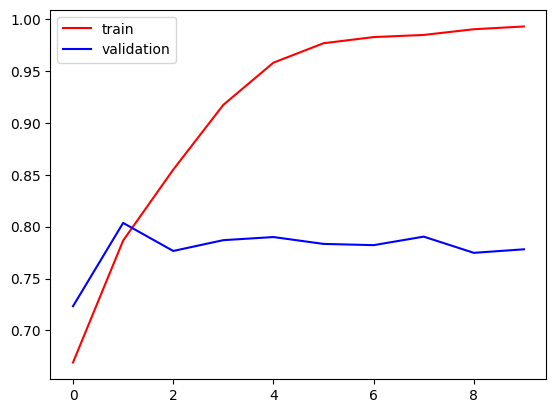

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [35]:
model1 = Sequential()

model1.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Flatten())

model1.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model1.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model1.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model1.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model1.add(Dense(1,activation='sigmoid'))

In [36]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 30, 30, 128)      

In [37]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
history1 = model1.fit(train_ds,epochs=15,validation_data=validation_ds)

Epoch 1/15
625/625 [==============================] - 61s 91ms/step - loss: 0.6885 - accuracy: 0.5335 - val_loss: 0.6805 - val_accuracy: 0.5664
Epoch 2/15
625/625 [==============================] - 58s 92ms/step - loss: 0.6257 - accuracy: 0.6454 - val_loss: 0.5555 - val_accuracy: 0.7188
Epoch 3/15
625/625 [==============================] - 58s 92ms/step - loss: 0.5037 - accuracy: 0.7531 - val_loss: 0.4808 - val_accuracy: 0.7722
Epoch 4/15
625/625 [==============================] - 55s 86ms/step - loss: 0.4048 - accuracy: 0.8152 - val_loss: 0.4383 - val_accuracy: 0.8038
Epoch 5/15
625/625 [==============================] - 58s 92ms/step - loss: 0.3213 - accuracy: 0.8576 - val_loss: 0.4024 - val_accuracy: 0.8210
Epoch 6/15
625/625 [==============================] - 57s 90ms/step - loss: 0.2312 - accuracy: 0.9049 - val_loss: 0.4205 - val_accuracy: 0.8322
Epoch 7/15
625/625 [==============================] - 55s 87ms/step - loss: 0.1614 - accuracy: 0.9353 - val_loss: 0.5084 - val_accuracy:

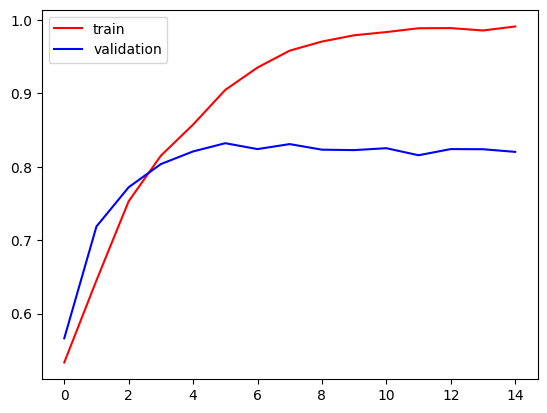

In [39]:
plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()